### Import libraries

In [1]:
import sys
sys.path.append("..")
import os
from model import experimental_model, experimental2d_model, grapher
from data import batch_creator, loader, data_generation
from helpers import helpers, plotter, metrics
import tensorflow as tf
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import itertools

In [3]:
kernel = "yearly_global_avg_climate"
d = True

In [4]:
mpi = np.load('/Users/omernivron/Downloads/MPI_ESM_yearly_global_mean.npy')
gfdl = np.load('/Users/omernivron/Downloads/GFDL_yearly_global_mean.npy')

In [5]:
save_dir = os.path.expanduser('~/Downloads/' + kernel)

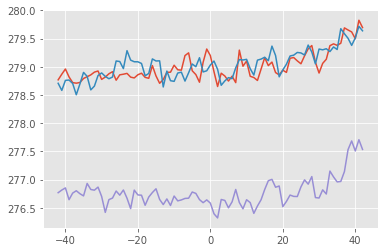

In [11]:
plt.plot(t[:85], mpi[17])
plt.plot(t[:85], mpi[7])
plt.plot(t[:85], gfdl[17])

In [228]:
data = np.concatenate((mpi, gfdl), axis = 0)
μ = np.mean(data)
σ = np.std(data)
mpi = (mpi - μ) 
gfdl = (gfdl - μ) 

In [229]:
n = mpi.shape[0]
m = gfdl.shape[0]
seq_len = 85

In [230]:
gfdl.shape

(30, 85)

In [231]:
combos = list(itertools.combinations(np.arange(n), 2)) + [(i, i) for i in range(n)]
data = [np.concatenate((mpi[pair[0]].reshape(1, -1), gfdl[pair[1]].reshape(1, -1)), axis = 1) if (pair[1] < 30) else np.zeros((1, 170)) for pair in combos]
y = np.array(data)

In [232]:
df = np.concatenate(data, axis=0)

In [245]:
y = df[~np.all(df == 0, axis=1)]

In [7]:
t = np.concatenate((np.arange(1921, 2006), np.arange(1921, 2006)))
t = t - np.mean(np.arange(1921, 2006))

In [247]:
def embed_position(t, d, TΔmin, Tmax):  # return.shape=(T,B,d)
    # t.shape=(T,B)   T=sequence_length, B=batch_size
    """A position-embedder, similar to the Attention paper, but tweaked to account for
    floating point positions, rather than integer.
    """
    R = Tmax / TΔmin * 100
    drange_even = TΔmin * R**(np.arange(0,d,2)/d)
    drange_odd = TΔmin * R**((np.arange(1,d,2) - 1)/d)
    x = np.concatenate([np.sin(t[:,:,None] / drange_even), np.cos(t[:,:,None] / drange_odd)], 2)
    return x

In [248]:
k = np.concatenate([np.zeros(seq_len, dtype=int), np.ones(seq_len, dtype=int)])

In [249]:
x1 = embed_position(t[:,None], d=80, TΔmin= 0.2, Tmax=30)
x2 = tf.one_hot(k, 2)[:, None, :]
x = np.concatenate((x1, x2), axis =-1).squeeze()[None, :, :]

In [318]:
k.shape

(170,)

In [319]:
x.shape

(1, 170, 82)

In [262]:
batch_x = np.repeat(x, 32, axis =0)

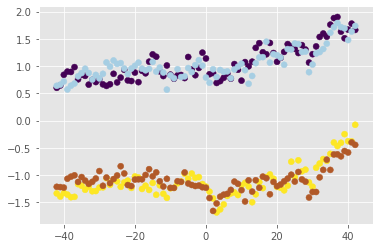

In [263]:
cmap = plt.get_cmap('Paired', 2)

fig,ax = plt.subplots()
# ax.scatter(t, y[24], c=k, cmap=cmap)
ax.scatter(t, y[18], c=k)
ax.scatter(t, y[38], c=k, cmap=cmap)
plt.show()

In [300]:
train_step, test_step, train_loss, test_loss, m_tr, m_te = grapher.build_graph()

In [301]:
# b_data = batch_creator.create_batch(em_x = data[1], em_y=data[3], x = data[5], y = data[-1], batch_s=2, d=d)
# b_data_te = b_data

In [302]:
# Uncomment the two lines below for one batch to overfit on
# np.random.seed(443)
# b_data, c = batch_creator.create_batch_2d(data[2], data[-3], data[-1], batch_s=20, em_2 = data[3])

### Training

Does not exist
New folder /Users/omernivron/Downloads/yearly_global_avg_climate/ckpt/check_run_1
Initializing from scratch.


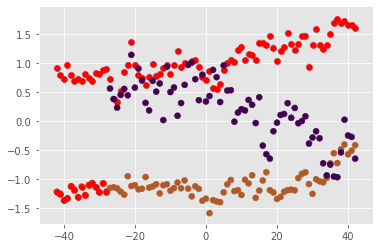

Epoch 0 batch 0 train Loss 5.1963 test Loss 2.8430 with training MSE metric 2.7765 and testing MSE metric 2.2088
learning rate is 0.0003000000142492354


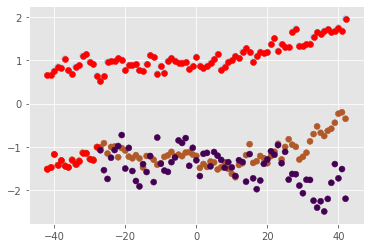

Epoch 0 batch 10 train Loss 0.3241 test Loss 0.3478 with training MSE metric 0.4185 and testing MSE metric 0.4480
learning rate is 0.0003000000142492354
Time taken for 1 epoch: 5.406144857406616 secs



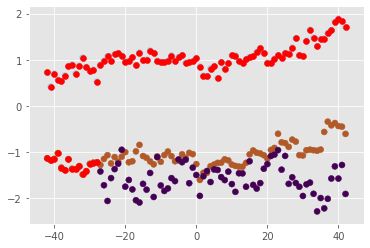

Epoch 1 batch 0 train Loss 0.3211 test Loss 0.3261 with training MSE metric 0.3777 and testing MSE metric 0.4147
learning rate is 0.0003000000142492354


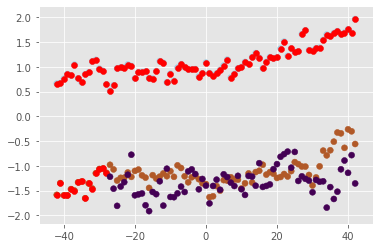

Epoch 1 batch 10 train Loss 0.1684 test Loss 0.1387 with training MSE metric 0.1991 and testing MSE metric 0.1742
learning rate is 0.0003000000142492354
Time taken for 1 epoch: 3.9733099937438965 secs



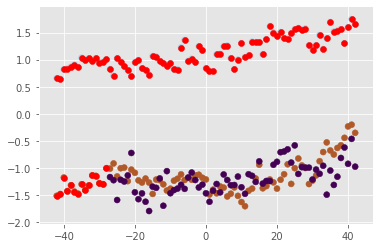

Epoch 2 batch 0 train Loss 0.0158 test Loss -0.0614 with training MSE metric 0.1446 and testing MSE metric 0.0987
learning rate is 0.0003000000142492354


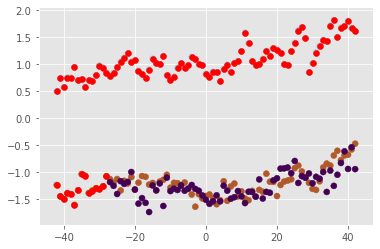

Epoch 2 batch 10 train Loss -0.1219 test Loss -0.2119 with training MSE metric 0.1052 and testing MSE metric 0.0723
learning rate is 0.0003000000142492354
Time taken for 1 epoch: 3.911355972290039 secs



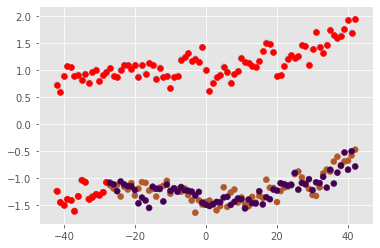

Epoch 3 batch 0 train Loss -0.2225 test Loss -0.3336 with training MSE metric 0.0719 and testing MSE metric 0.0430
learning rate is 0.0003000000142492354


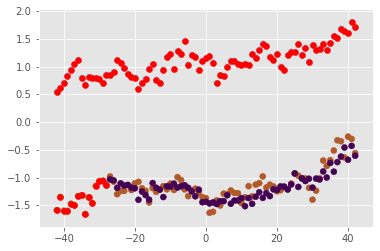

Epoch 3 batch 10 train Loss -0.2674 test Loss -0.4182 with training MSE metric 0.0601 and testing MSE metric 0.0270
learning rate is 0.0003000000142492354
Time taken for 1 epoch: 4.0574798583984375 secs



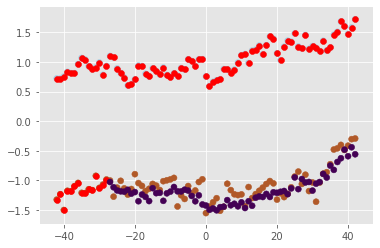

Epoch 4 batch 0 train Loss -0.3006 test Loss -0.4377 with training MSE metric 0.0511 and testing MSE metric 0.0259
learning rate is 0.0003000000142492354


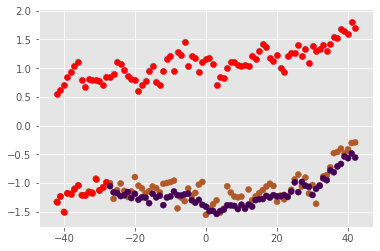

Epoch 4 batch 10 train Loss -0.3460 test Loss -0.4551 with training MSE metric 0.0435 and testing MSE metric 0.0262
learning rate is 0.0003000000142492354
Time taken for 1 epoch: 3.8004629611968994 secs



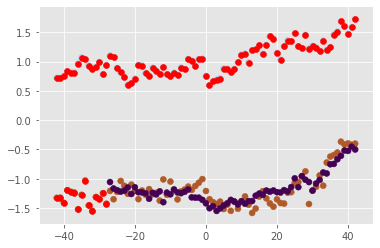

Epoch 5 batch 0 train Loss -0.3831 test Loss -0.4812 with training MSE metric 0.0383 and testing MSE metric 0.0243
learning rate is 0.0003000000142492354


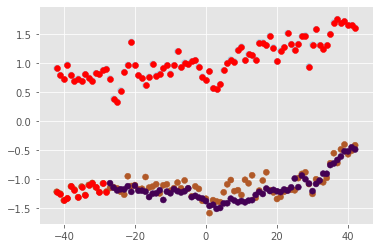

Epoch 5 batch 10 train Loss -0.3987 test Loss -0.4977 with training MSE metric 0.0355 and testing MSE metric 0.0232
learning rate is 0.0003000000142492354
Time taken for 1 epoch: 3.95693302154541 secs



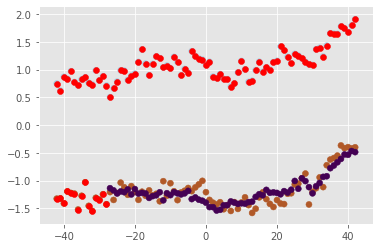

Epoch 6 batch 0 train Loss -0.4225 test Loss -0.5047 with training MSE metric 0.0328 and testing MSE metric 0.0236
learning rate is 0.0003000000142492354


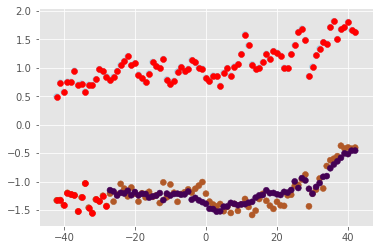

Epoch 6 batch 10 train Loss -0.4536 test Loss -0.5158 with training MSE metric 0.0294 and testing MSE metric 0.0226
learning rate is 0.0003000000142492354
Time taken for 1 epoch: 3.7482218742370605 secs



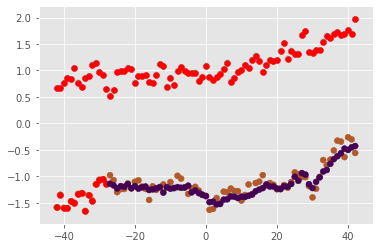

Epoch 7 batch 0 train Loss -0.4412 test Loss -0.5395 with training MSE metric 0.0308 and testing MSE metric 0.0205
learning rate is 0.0003000000142492354


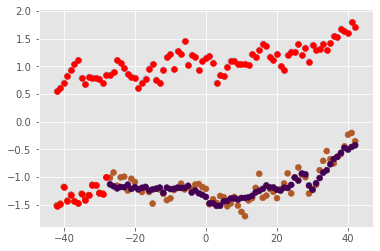

Epoch 7 batch 10 train Loss -0.4802 test Loss -0.5579 with training MSE metric 0.0261 and testing MSE metric 0.0191
learning rate is 0.0003000000142492354
Time taken for 1 epoch: 3.5361440181732178 secs



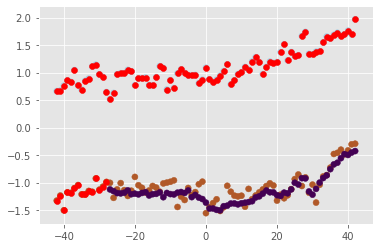

Epoch 8 batch 0 train Loss -0.4452 test Loss -0.5479 with training MSE metric 0.0297 and testing MSE metric 0.0204
learning rate is 0.0003000000142492354


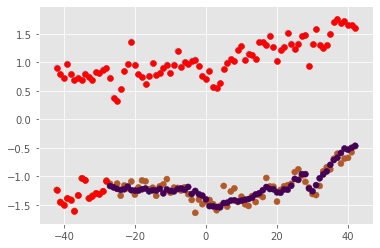

Epoch 8 batch 10 train Loss -0.4958 test Loss -0.5275 with training MSE metric 0.0249 and testing MSE metric 0.0223
learning rate is 0.0003000000142492354
Time taken for 1 epoch: 3.7381513118743896 secs



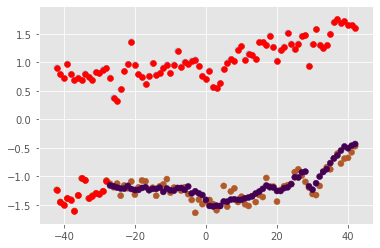

Epoch 9 batch 0 train Loss -0.5005 test Loss -0.5384 with training MSE metric 0.0251 and testing MSE metric 0.0214
learning rate is 0.0003000000142492354


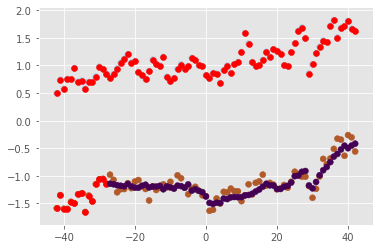

Epoch 9 batch 10 train Loss -0.5114 test Loss -0.5683 with training MSE metric 0.0238 and testing MSE metric 0.0190
learning rate is 0.0003000000142492354
Time taken for 1 epoch: 3.7383086681365967 secs



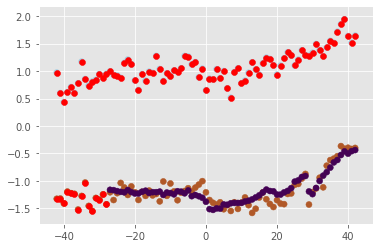

Epoch 10 batch 0 train Loss -0.5029 test Loss -0.5357 with training MSE metric 0.0249 and testing MSE metric 0.0218
learning rate is 0.0003000000142492354


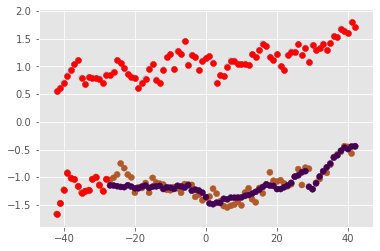

Epoch 10 batch 10 train Loss -0.5086 test Loss -0.5851 with training MSE metric 0.0240 and testing MSE metric 0.0178
learning rate is 0.0003000000142492354
Time taken for 1 epoch: 3.59013295173645 secs



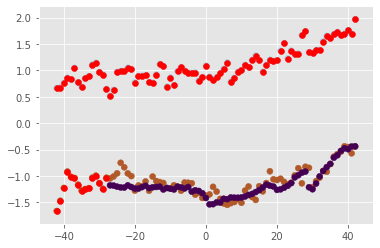

Epoch 11 batch 0 train Loss -0.5020 test Loss -0.5461 with training MSE metric 0.0247 and testing MSE metric 0.0211
learning rate is 0.0003000000142492354


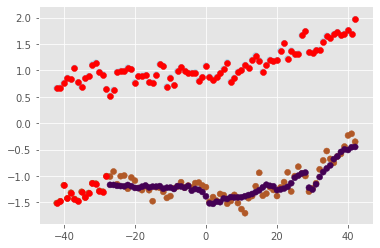

Epoch 11 batch 10 train Loss -0.5198 test Loss -0.5539 with training MSE metric 0.0232 and testing MSE metric 0.0204
learning rate is 0.0003000000142492354
Time taken for 1 epoch: 3.5275378227233887 secs



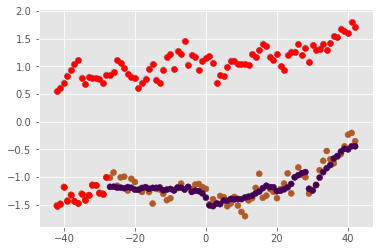

Epoch 12 batch 0 train Loss -0.5280 test Loss -0.5766 with training MSE metric 0.0224 and testing MSE metric 0.0187
learning rate is 0.0003000000142492354


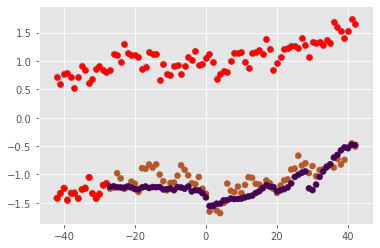

Epoch 12 batch 10 train Loss -0.5091 test Loss -0.5291 with training MSE metric 0.0242 and testing MSE metric 0.0225
learning rate is 0.0003000000142492354
Time taken for 1 epoch: 3.7407820224761963 secs



KeyboardInterrupt: 

In [303]:
if __name__ == '__main__':
    tf.random.set_seed(443); step = 0
    # change to run 9 if you want to overfit
    EPOCHS = 575; batch_s  = 32; run = 1; tr_regime ='shuffle'
    l= [82, 64, 32]; heads = 32; e = 82; context = 100; c=100
    decoder, optimizer_c, ckpt, manager, num_batches, writer, folder = helpers.pre_trained_loader(data[3], save_dir, e, l, d=d, batch_s=64, context=context, heads=1, run=run)
    with writer.as_default():
        for epoch in range(EPOCHS):
            start = time.time()
            for batch_n in range(20):
                m_tr.reset_states(); train_loss.reset_states()
                if d:
                    idxs = np.random.choice(np.arange(380), 32)
                    permute_idx = np.arange(170)
                    y_tr = y[idxs, :][:, permute_idx] 
                    to_gather = helpers.gather_idx(c,  l=170, b=32)
                    temp = np.zeros((32, 170))
                    temp[to_gather[:, 0], to_gather[:, 1]] = 1
#                   b_data, c = batch_creator.batch_regime_2d(x = data[-3], y = data[-1], em = data[2] , em_2 =  data[3], batch_s=64, context_p=50, kind='shuffle')
                    # add parameter b=20 to helpers.gather_idx if you want to overfit and comment line above
                    pred, pred_log, weights, names, shapes, y_real, g = train_step(decoder, optimizer_c, train_loss, m_tr, batch_x[:, permute_idx], y_tr, d = True, to_gather=temp)
                else:
#                     b_data = batch_creator.create_batch(em_x = data[1], x = data[3], y = data[-1], batch_s=64, d=d)
                    to_gather = helpers.gather_idx(context, l=200, b=2)
                    temp = np.zeros((b_data[0].shape[0], b_data[0].shape[1]))
                    temp[to_gather[:, 0], to_gather[:, 1]] = 1
                    pred, pred_log, weights, names, shapes, y_real, g = train_step(decoder, optimizer_c, train_loss, m_tr, x = b_data[2], y = b_data[0], y2=b_data[3], to_gather = temp)
                if (epoch == 0) & (batch_n == 0): helpers.write_speci(folder, names, shapes, context, heads)
                if batch_n % 10 == 0:
                    m_te.reset_states(); test_loss.reset_states()
                    if d:
                        idxs_te = np.random.choice(np.arange(380, 465), 32)
                        permute_idx_te = np.arange(170)
                        to_gather_te = helpers.gather_idx(c, l=170, b=32)
                        temp_te = np.zeros((32, 170))
                        temp_te[to_gather_te[:, 0], to_gather_te[:, 1]] = 1
                        y_te = y[idxs_te, :][:, permute_idx_te] 
                        pred_te, pred_log_te = test_step(decoder, test_loss, m_te, x_te = batch_x[:, permute_idx_te], y_te = y_te, to_gather=temp_te, d=True)
                        fig,ax = plt.subplots()
                        
                        ax.scatter(t, y_te[1], c=k, cmap=cmap)
                        ax.scatter(t[:100], y_te[1][:100], c='red')
                        ax.scatter(t[100:], pred_te[1, 99:], c=k[100:]) 
                        plt.show()
                        
                        
                        
#                         b_data_te, c_te = batch_creator.batch_regime_2d(x = data[-4], y = data[-2], em = data[0] , em_2 =  data[1], batch_s=64, context_p=context, kind=tr_regime)
#                         to_gather_te = helpers.gather_idx(c_te)
#                         temp_te = np.zeros((b_data_te[0].shape[0], b_data_te[0].shape[1]))
#                         temp_te[to_gather_te[:, 0], to_gather_te[:, 1]] = 1
#                         pred_te, pred_log_te = test_step(decoder, test_loss, m_te, x_te = b_data_te[2], y_te = b_data_te[0], x2_te = b_data_te[3], to_gather=temp_te, d=True)
#                         ## Plotting progress by looking at a random test case. Erase _te from the six lines below if you rather observe training

#                         if to_gather_te is not None:
#                             # change 64 to 20 if you are overfitting
#                             idd = np.random.choice(np.arange(0, 64))
#                             seq_l = to_gather_te[to_gather_te[:, 0] == idd][0, 1]
#                             plt.scatter(b_data_te[1][idd, :seq_l], b_data_te[0][idd, :seq_l] , c = 'blue', label = 'context')
#                             plt.scatter(b_data_te[1][idd, seq_l:], b_data_te[0][idd, seq_l:], c = 'black', label = 'observed func.', alpha=0.5)
#                             plt.scatter(b_data_te[1][idd, seq_l:], pred_te[idd][(seq_l - 1):], label = 'predicted func.')
#                             plt.legend()
#                             plt.show()
#                         else:
#                             plotter.follow_training_plot2d(x_tr = b_data[1], y_tr = b_data[0], em_2_tr = b_data[3] , pred = pred, x_te = b_data_te[2], y_te = b_data_te[0], em_2_te = b_data_te[3] ,pred_te = pred_te, num_context = context)
                    else:
                        pred_te, pred_log_te = test_step(decoder, test_loss, m_te, x_te = b_data_te[2], y_te = b_data_te[0], y2_te=b_data_te[3], to_gather = temp)
                        plotter.follow_training_plot(x_tr = b_data[1], y_tr = b_data[0], pred = pred, x_te = b_data_te[2], y_te = b_data_te[0], pred_te = pred_te, num_context = context)
                    helpers.print_progress(epoch, batch_n, train_loss.result(), test_loss.result(), m_tr.result(), m_te.result())
                    helpers.tf_summaries(run, step, train_loss.result(), test_loss.result(), m_tr.result(), m_te.result(), weights, names)
                    print('learning rate is {}'.format(optimizer_c._decayed_lr('float32').numpy()))
#                     if d:
#                         m0, m1 = metrics.r_sq_2d(b_data[0][:, 1:], pred.numpy(), b_data[3][:, 1:], context_p = context)
#                         m0_te, m1_te = metrics.r_sq_2d(b_data_te[0][:, 1:], pred_te.numpy(), b_data_te[3][:, 1:], context_p = context)
#                         print('r squared training, series 0: {}, series 1: {}'.format(m0, m1))
#                         print('r squared testing, series 0: {}, series 1: {}'.format(m0_te, m1_te))
                    manager.save()
                step += 1
                ckpt.step.assign_add(1)
            print ('Time taken for 1 epoch: {} secs\n'.format(time.time() - start))

In [304]:
y.shape

(465, 170)

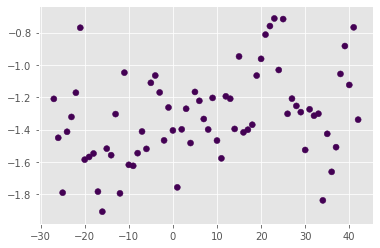

In [299]:
plt.scatter(t[100:], pred_te[1, 99:], c=k[100:]) 

### Embeddings in tensorboard

In [ ]:
helpers.tensorboard_embeddings(decoder, layer_num = 0, meta_data = np.concatenate(([0, 1], np.unique(b_data[2]))))

### Inference

In [311]:
x_s.shape

(1, 170, 82)

In [313]:
batch_x.shape

(32, 170, 82)

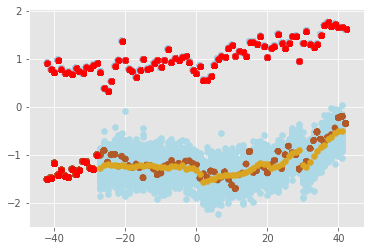

In [316]:
idd = np.random.choice(np.arange(65))
fig,ax = plt.subplots()
for j in range(100):
    x = batch_x[0, :][None, :, :]
    y_s = y[400 + idd, :100] 
    y_s = y_s[:-1][None, :]
    for i in range(69):
        x_s = x[:, :(100 + i), :]
        _, _, sample_y = evaluate(decoder, x_s, y_s, d=d, sample=True)
        y_s = tf.concat((y_s, tf.reshape(sample_y, [1, 1])), axis=1)
    ax.scatter(t, y[400+idd], c=k, cmap=cmap)
    ax.scatter(t[:100], y[400+idd][:100], c='red')
    ax.scatter(t[100:-1], (y_s.numpy()[:, 99:]), c='lightblue')
x = batch_x[0, :][None, :, :]
y_s = y[400 + idd, :100] 
y_s = y_s[:-1][None, :]
for i in range(69):
    x_s = x[:, :(100 + i), :]
    _, _, sample_y = evaluate(decoder, x_s, y_s, d=d, sample=False)
    y_s = tf.concat((y_s, tf.reshape(sample_y, [1, 1])), axis=1)
ax.scatter(t, y[400+idd], c=k, cmap=cmap)
ax.scatter(t[:100], y[400+idd][:100], c='red')
ax.scatter(t[100:-1], (y_s.numpy()[:, 99:]), c='goldenrod') 

In [309]:
def evaluate(model, x, y, sample=True, d=False):

    combined_mask_x = masks.create_masks(x[:, :, 0])
    pred = model(x, y, False, combined_mask_x[:, :-1, :-1])
    if sample:
        sample_y = np.random.normal(pred[-1, 0], np.exp(pred[-1, 1]))
    else:
        sample_y = pred[-1, 0]

    return pred[:, 0], pred[:, 1], sample_y

In [308]:
from helpers import masks